In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import random as rand
import numpy as np
from network import Network
from perceptron import Perceptron
from scores import Scores
from util import *
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import pandas as pd

In [3]:
%matplotlib inline
sns.set()

In [4]:
def plot(pontos, a, b):
    px = [p[0] for p in pontos]
    py = [p[1] for p in pontos]
    y = [a*x + b for x in px]
    plt.figure(figsize=(8,6))
    plt.plot(px, py, 'g.')
    plt.plot(px, y, 'r--')
    plt.show()

### Método mais rápido para iterar dataframes como uma lista => df.itertuples()

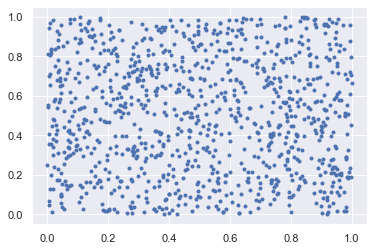

In [105]:
def reta(ponto):
    return ponto[0] + ponto[1] + 0.1

def sinal(ponto):
    return 1 if reta(ponto) >= 0 else 0

x_train, y_train = [], []
for i in range(1000):
    x_train.append([rand.random(), rand.random()])
    y_train.append([reta(x_train[i])])

df_x_train = pd.DataFrame(x_train)
plt.plot(np.array(df_x_train.loc[:,0]), np.array(df_x_train.loc[:,1]), ".")
plt.show()

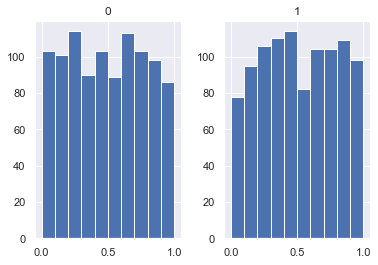

In [97]:
pd.DataFrame(x_train).hist()
plt.show()

[0.92228278 0.81699843] 0.01
[0.03469437] 0.01
Início: 0.034694*x + 0.010000 => MSE = 35.936125


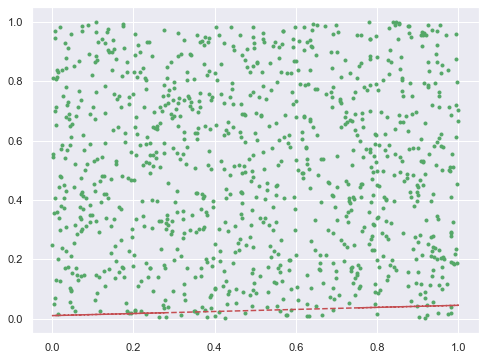

In [135]:
network = Network([2, 1, 1], taxa=0.001, ativacoes=[l_relu, der_l_relu, idem, one])

for layer in network.layers[1:]:
    for neuron in layer.neurons:
        print(neuron.weights, neuron.bias)

a = network.layers[2].neurons[0].weights[0]
b = network.layers[2].neurons[0].bias
mse = network.norma_l2(x_train, y_train)
print("Início: %f*x + %f => MSE = %f"%(a, b, mse))
plot(x_train, a, b)


[1.09041064 1.07984835] -0.07813729887927641
[0.91909876] 0.17469801369356336
Após 9 passos => MSE = 0.087275


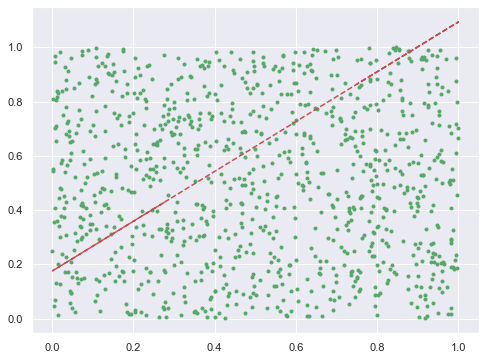

In [139]:
for k in tqdm(range(10)):
    network.train(x_train, y_train)

for layer in network.layers[1:]:
    for neuron in layer.neurons:
        print(neuron.weights, neuron.bias)
    
a = network.layers[2].neurons[0].weights[0]
b = network.layers[2].neurons[0].bias
mse = network.norma_l2(x_train, y_train)
print("Após %d passos => MSE = %f"%(k, mse))
plot(x_train, a, b)    

### Me parece que o esquema será gerar um framework pra otimização linear dentro da própria classe network, pq a classe perceptron já tá muito bem feita para o caso não-linear, e com ativação por sinal

In [83]:
def sinal(ponto):
    return "1 Quadrante" if ponto[0] >= 0 and ponto[1] >= 0 else "Outros"

x_train, y_train = [], []
for i in range(1000):
    x_train.append([rand.random()*50-25, rand.random()*50-25])
    y_train.append([sinal(x_train[i])])
x_train = np.array(x_train)
y_train = np.array(y_train)

In [171]:
from perceptron import Perceptron
perceptron = Perceptron(M=50, taxa=0.1, estrategia="acuracia", debug=1)
perceptron.tqdm = tqdm
perceptron.ativacao_saida = idem
perceptron.der_ativacao_saida = one

In [172]:
perceptron.treinar(x_train, y_train)
print("Estrutura da rede:", perceptron.network.estrutura)

Neurônios: [2]



Acurácia: 0.999 | MSE: 0.011
Taxa=0.100 | Estrutura=[2, 2, 2]

Estrutura da rede: [2, 2, 2]


In [160]:
# exibindo pesos e viéses das camadas, exceto de entrada
for layer in perceptron.network.layers[1:]:
    for neuron in layer.neurons:
        print(neuron.weights, neuron.bias)

[0.01515598 4.65123941] -0.6050540674015681
[ 4.13404654 -0.09314814] 0.9013913686023008
[0.48667716 0.43184586] -0.2346817721367501
[-0.48667716 -0.43184586] 1.23468177213675


In [161]:
saidas = perceptron.processar([[1, 1], [-1, 1], [1, -1], [-1, -1]])
for s in saidas:
    print(s)
previsoes = perceptron.prever([[1, 1], [-1, 1], [1, -1], [-1, -1]])
for p in previsoes:
    print(p)

[1, 1]
0 [1, 1]
1 [0.98306581 0.99291236]
2 [0.672539 0.327461]
[-1, 1]
0 [-1, 1]
1 [0.98255373 0.03469651]
2 [0.25848823 0.74151177]
[1, -1]
0 [1, -1]
1 [0.00526635 0.99410997]
2 [0.19718352 0.80281648]
[-1, -1]
0 [-1, -1]
1 [0.00510992 0.04150673]
2 [-0.21427038  1.21427038]
[0.672539 0.327461]
[0.25848823 0.74151177]
[0.19718352 0.80281648]
[-0.21427038  1.21427038]
[1, 1]
0 [1, 1]
1 [0.98306581 0.99291236]
2 [0.672539 0.327461]
[-1, 1]
0 [-1, 1]
1 [0.98255373 0.03469651]
2 [0.25848823 0.74151177]
[1, -1]
0 [1, -1]
1 [0.00526635 0.99410997]
2 [0.19718352 0.80281648]
[-1, -1]
0 [-1, -1]
1 [0.00510992 0.04150673]
2 [-0.21427038  1.21427038]
['1 Quadrante']
['Outros']
['Outros']
['Outros']


In [155]:
x_test, y_test = [], []
for i in range(2000):
    x_test.append([rand.random()*50-25, rand.random()*50-25])
    y_test.append([sinal(x_test[i])])
x_test = np.array(x_test)
y_test = np.array(y_test)

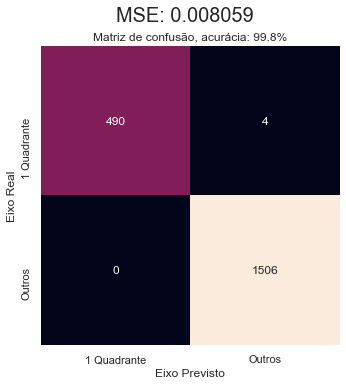

In [157]:
y_pred = perceptron.prever(x_test)
mse = perceptron.funcao_erro(x_test, y_test)
score = Scores(y_test, y_pred)
score.exibir_grafico("MSE: %f"%mse)

In [ ]:
%%timeit -r 1 -n 1
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[1]) 
plt.show() 

## FUNÇÃO DE ATIVAÇÃO

In [9]:
sns.set
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.0)

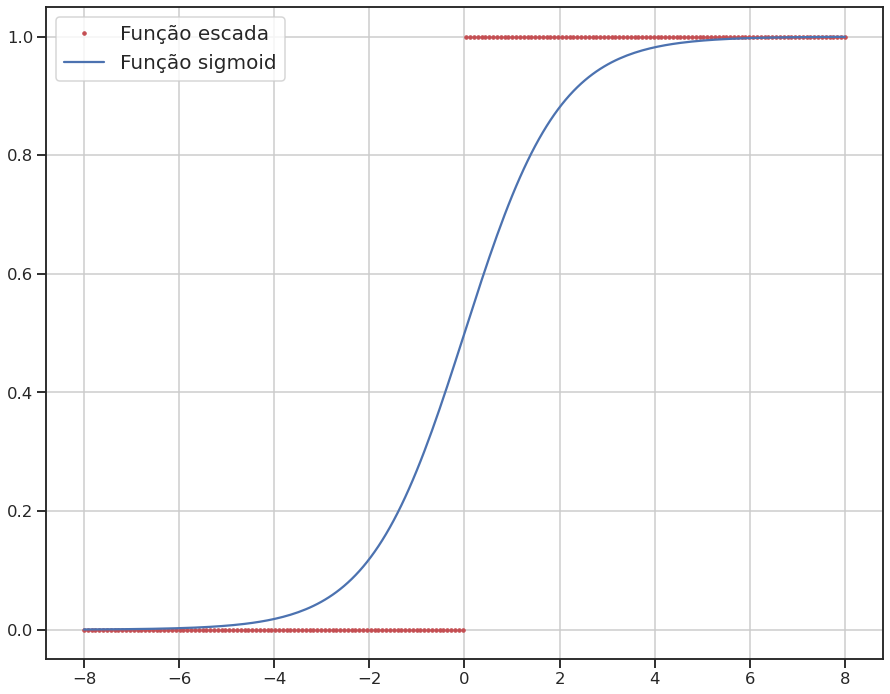

In [39]:
x = np.linspace(-8, 8, 200)
y1, y2, y3 = [], [], []
for i in x:
    if i >= 0:
        y1.append(1)
    else:
        y1.append(0)
    y2.append(sigmoid(i))
    
plt.figure(figsize=(15,12))
plt.plot(x, y1, 'r.', markersize=7, label="Função escada")
plt.plot(x, y2, 'b-', label="Função sigmoid")
plt.legend(loc=2, prop={'size': 20})
plt.grid(True)
plt.show()

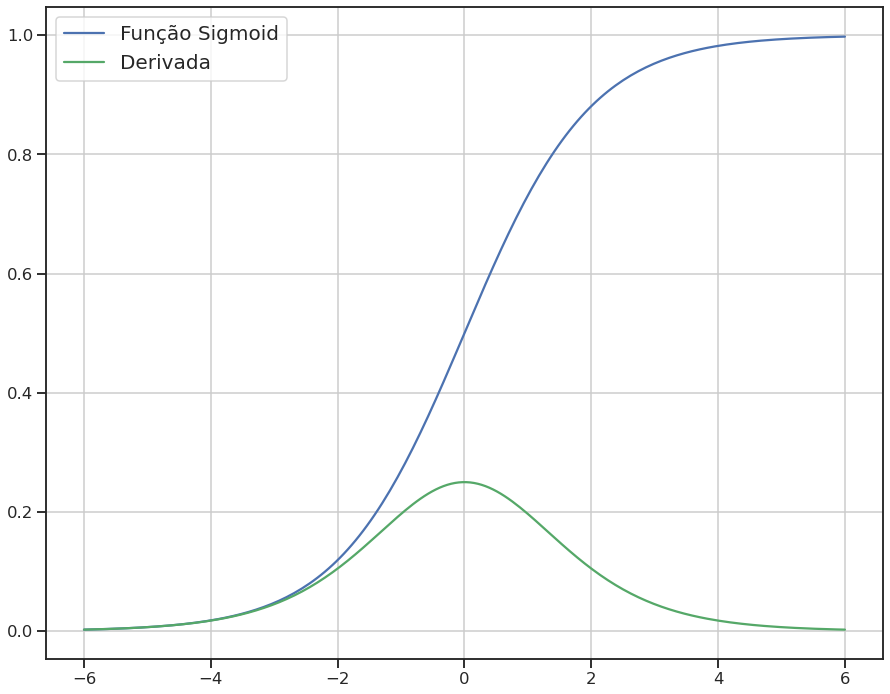

In [13]:
x = np.linspace(-6, 6, 200)
y1, y2, y3 = [], [], []
for i in x:
    y1.append(sigmoid(i))
    y2.append(der_sigmoid(i))
    
plt.figure(figsize=(15,12))
plt.plot(x, y1, 'b-', label="Função Sigmoid")
plt.plot(x, y2, 'g-', label="Derivada")
plt.legend(loc=2, prop={'size': 20})
plt.grid(True)
plt.show()

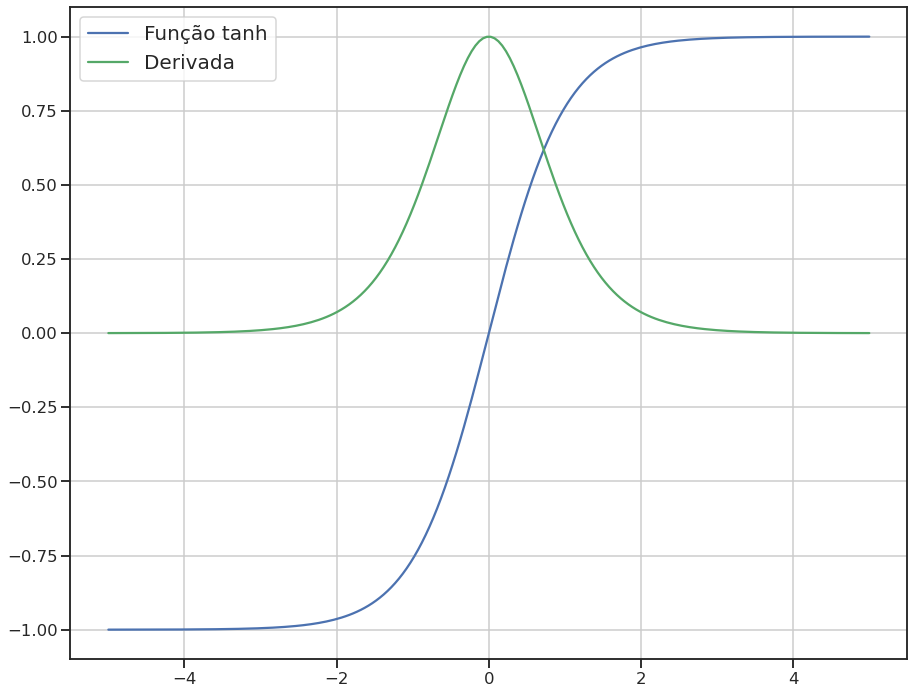

In [32]:
x = np.linspace(-5, 5, 200)
y1, y2 = [], []
for i in x:
    y1.append(tanh(i))
    y2.append(der_tanh(i))

plt.figure(figsize=(15,12))
plt.plot(x, y1, 'b-', label="Função tanh")
plt.plot(x, y2, 'g-', label="Derivada")
plt.legend(loc=2, prop={'size': 20})
plt.grid(True)
plt.show()

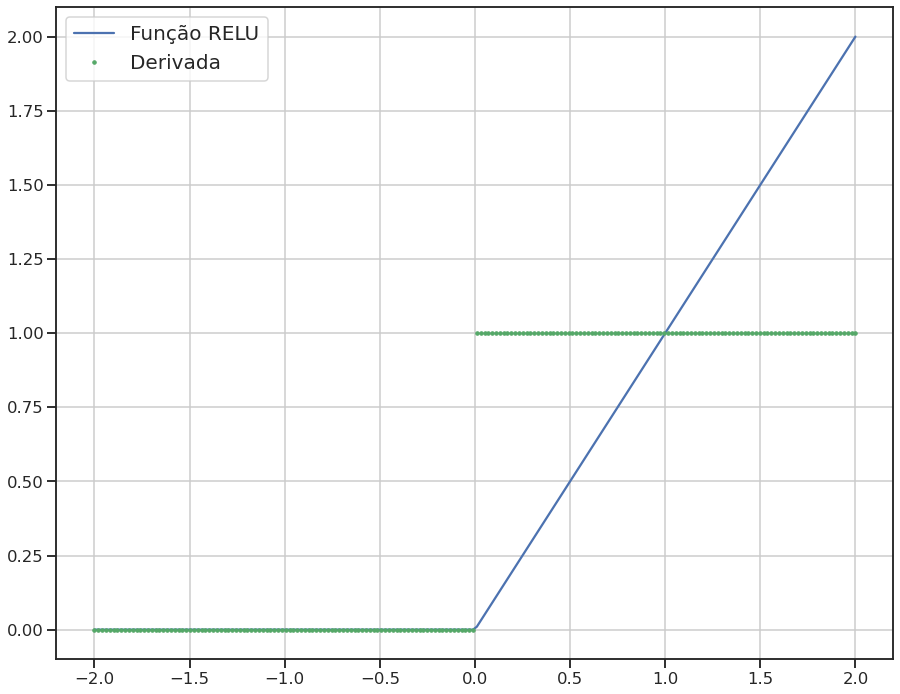

In [37]:
x = np.linspace(-2, 2, 200)
y1, y2 = [], []
for i in x:
    y1.append(relu(i))
    y2.append(der_relu(i))

plt.figure(figsize=(15,12))
plt.plot(x, y1, 'b-', label="Função RELU")
plt.plot(x, y2, color='g', marker='.', markersize=7, linestyle='', label="Derivada")
plt.legend(loc=2, prop={'size': 20})
plt.grid(True)
plt.show()

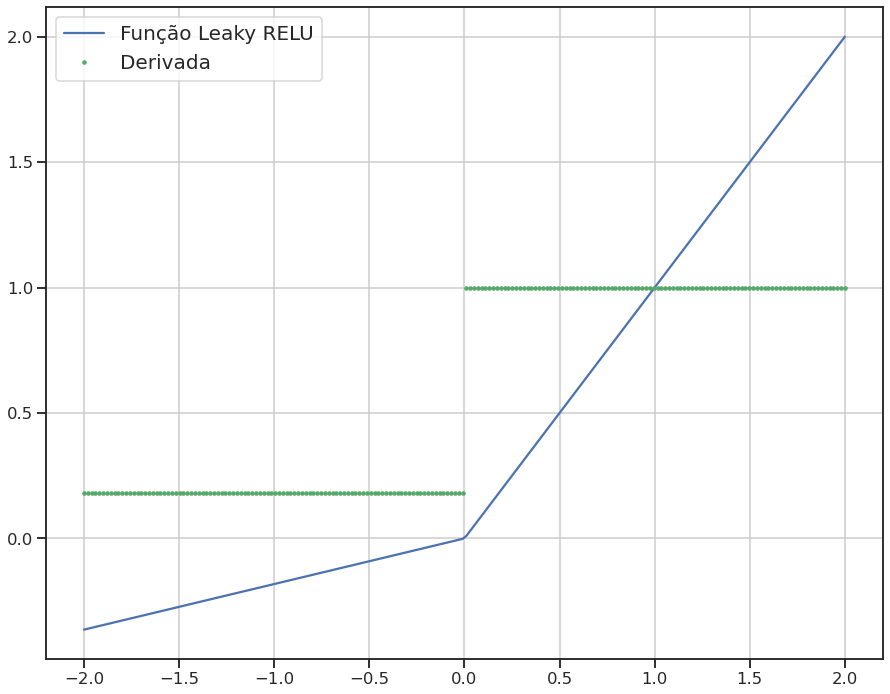

In [38]:
x = np.linspace(-2, 2, 200)
y1, y2 = [], []
for i in x:
    y1.append(l_relu(i))
    y2.append(der_l_relu(i))

plt.figure(figsize=(15,12))
plt.plot(x, y1, 'b-', label="Função Leaky RELU")
plt.plot(x, y2, color='g', marker='.', markersize=7, linestyle='', label="Derivada")
plt.legend(loc=2, prop={'size': 20})
plt.grid(True)
plt.show()

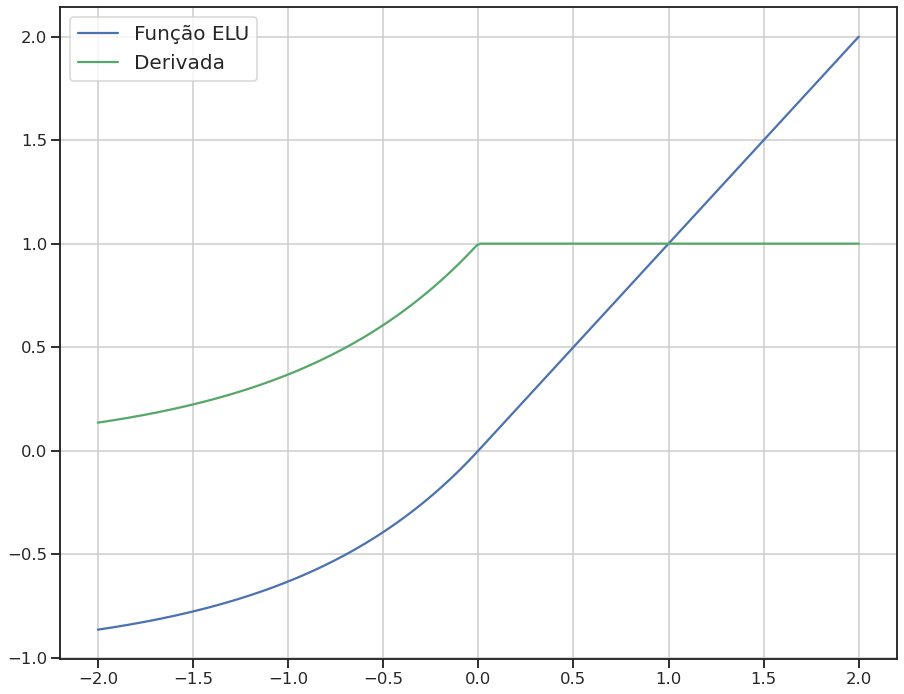

In [35]:
x = np.linspace(-2, 2, 200)
y1, y2 = [], []
for i in x:
    y1.append(elu(i))
    y2.append(der_elu(i))

plt.figure(figsize=(15,12))
plt.plot(x, y1, 'b-', label="Função ELU")
plt.plot(x, y2, 'g-', label="Derivada")
plt.legend(loc=2, prop={'size': 20})
plt.grid(True)
plt.show()